In [25]:
import plotly as py
# #you need to create an account an get an ID in order to be able to run this
py.tools.set_credentials_file(username='colinvl', api_key='1OPZLs5vGngi8R4dDulM')


import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\20175863\Documents\JADS\DEiA2\df_for_colin.csv')

In [3]:
df['Forward_leaning'] = 90 - df['Forward_leaning']

In [4]:
df.Fragment.value_counts()

1    54
0    54
2    53
3    47
4     1
Name: Fragment, dtype: int64

In [7]:
del df['video.1']

In [8]:
df = df.round(3)

In [9]:
df['round_speed'] = round(df['speed (km/h)'])

In [10]:
df6 = df.dropna()

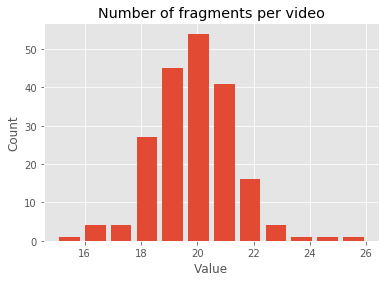

In [11]:
fig = plt.figure()
plt.hist(df6['round_speed'], bins = 12, rwidth = 0.8)
plt.title("Number of fragments per video")
plt.ylabel('Count')
plt.xlabel('Value')
plt.show()

### Convert df to a melt

In [18]:
identifiers = ['video', 'Fragment', 'speed (km/h)']

In [19]:
features = ['Left Ear', 'Left Elbow', 'Left Eye', 'Left Foot', 'Left Hand',
 'Left Hip', 'Left Knee', 'Left Shoulder', 'Neck', 'Nose', 'Right Ear',
 'Right Elbow', 'Right Eye', 'Right Foot', 'Right Hand', 'Right Hip',
 'Right Knee', 'Right Shoulder', 'Forward_leaning']

In [20]:
df2 = pd.melt(df, id_vars= identifiers, var_name='Feature', value_name = 'Value')

In [22]:
df2.head()

,video,Fragment,speed (km/h),Feature,Value
0,1,0,20.160,Left Ear,0.050
1,1,1,18.879,Left Ear,0.038
2,1,2,17.704,Left Ear,0.062
3,1,3,18.558,Left Ear,0.034
4,2,0,20.226,Left Ear,0.046


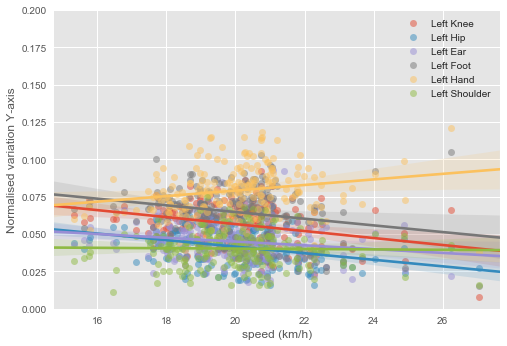

In [26]:
lm = sns.regplot(data=df, x='speed (km/h)', y='Left Knee', label = 'Left Knee', scatter_kws={'alpha':0.5})
lm = sns.regplot(data=df, x='speed (km/h)', y='Left Hip', label = 'Left Hip', scatter_kws={'alpha':0.5})
lm = sns.regplot(data=df, x='speed (km/h)', y='Left Ear', label = 'Left Ear', scatter_kws={'alpha':0.5})
lm = sns.regplot(data=df, x='speed (km/h)', y='Left Foot', label = 'Left Foot', scatter_kws={'alpha':0.5})
lm = sns.regplot(data=df, x='speed (km/h)', y='Left Hand', label = 'Left Hand', scatter_kws={'alpha':0.5})
lm = sns.regplot(data=df, x='speed (km/h)', y='Left Shoulder', label = 'Left Shoulder', scatter_kws={'alpha':0.5})
axes = lm.axes
axes.set_ylim(0,0.2)
plt.ylabel("Normalised variation Y-axis")
plt.legend()
plt.show()

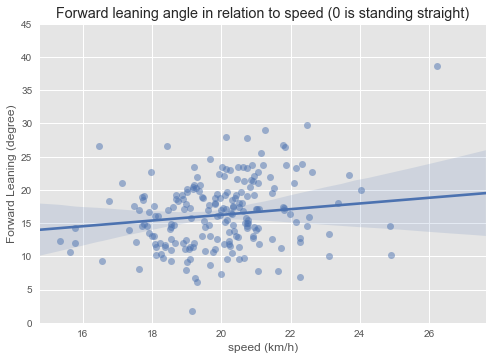

In [66]:
lm = sns.regplot(data=df, x='speed (km/h)', y='Forward_leaning', label = 'Left Hand', scatter_kws={'alpha':0.5}, color = '#4c72b0')
axes = lm.axes
axes.set_title('Forward leaning angle in relation to speed (0 is standing straight)')
axes.set_ylim(0,45)
axes.set(ylabel='Forward Leaning (degree)')
plt.show()

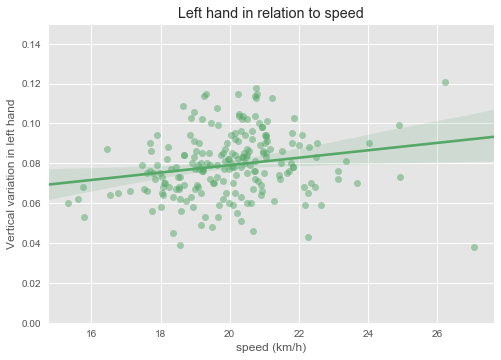

In [69]:
lm = sns.regplot(data=df, x='speed (km/h)', y='Left Hand', label = 'Left Hand', scatter_kws={'alpha':0.5}, color = '#55a868')
axes = lm.axes
axes.set_title('Left hand in relation to speed')
axes.set(ylabel='Vertical variation in left hand')
axes.set_ylim(0,0.15)
plt.show()

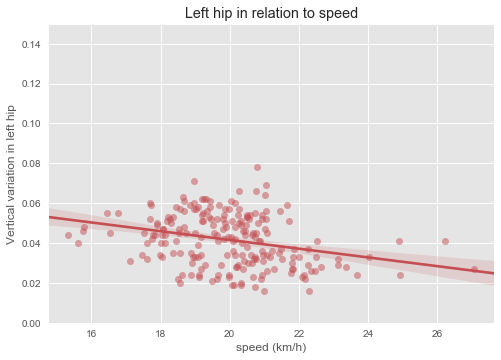

In [70]:
lm = sns.regplot(data=df, x='speed (km/h)', y='Left Hip', label = 'Left Hand', scatter_kws={'alpha':0.5}, color = '#c44e52')
axes = lm.axes
axes.set_title('Left hip in relation to speed')
axes.set(ylabel='Vertical variation in left hip')
axes.set_ylim(0,0.15)
plt.show()

### Plotting correlations between feature subset

In [73]:
use_features = ['Left Ear', 'Left Elbow', 'Left Eye', 'Left Foot', 'Left Hand', 'Left Hip',
 'Left Knee', 'Left Shoulder', 'Neck', 'Forward_leaning', 'speed (km/h)']

In [74]:
df2 = df[use_features]
colors = df2['speed (km/h)'].tolist()

#this is not very pretty, I know. suggestions welcome
for i in range(len(colors)):
    if df2.iloc[i, 10] >= 23:
        colors[i] = '#CC0000'
    if  df2.iloc[i, 10] <= 23:
        colors[i] = '#FF3333'
    if  df2.iloc[i, 10] <=22:
        colors[i] = '#FF9999'
    if  df2.iloc[i, 10] <=21:
        colors[i] = '#99CCFF'
    if  df2.iloc[i, 10] <=20:
        colors[i] = '#3399FF'
    if  df2.iloc[i, 10] <=19:
        colors[i] = '#0000CC'

In [75]:
df3 = df2.copy()
del df3['speed (km/h)']

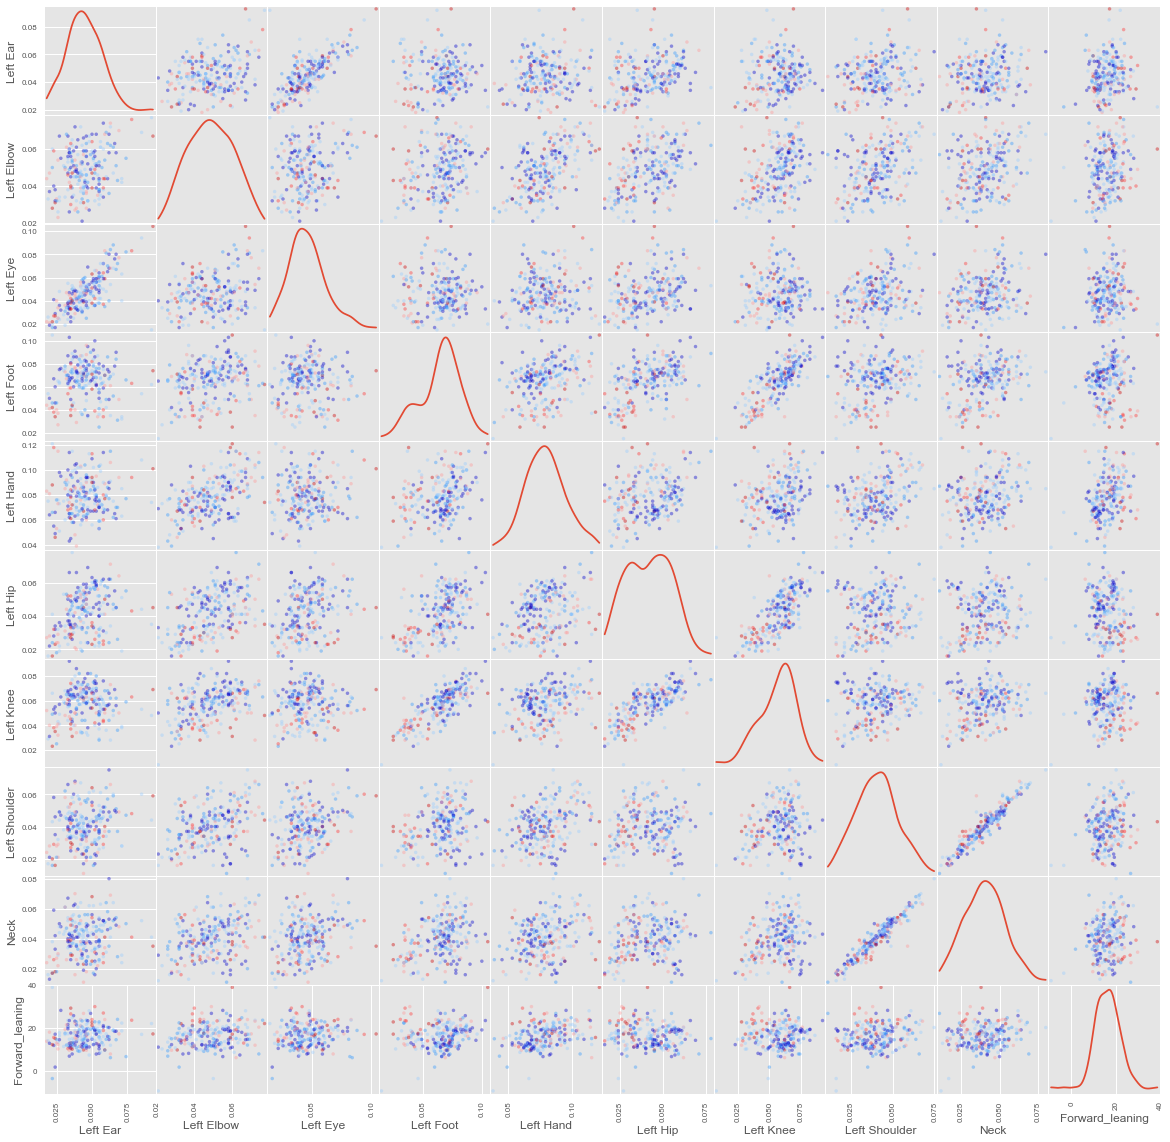

In [77]:
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(df3, alpha = 0.4, figsize = (20,20), diagonal = 'kde', color = colors)
plt.yticks(rotation=90)
plt.show()

#https://stackoverflow.com/questions/7941207/is-there-a-function-to-make-scatterplot-matrices-in-matplotlib

### Correlation with speed

In [78]:
features = ['Left Ear', 'Left Elbow', 'Left Eye', 'Left Foot', 'Left Hand', 'Left Hip',
 'Left Knee', 'Left Shoulder', 'Neck', 'Nose', 'Right Ear', 'Right Elbow', 'Right Eye',
 'Right Foot', 'Right Hand', 'Right Hip', 'Right Knee', 'Right Shoulder', 'Forward_leaning']

In [89]:
del df['video']
del df['Fragment']
del df['round_speed']

In [90]:
list(df)

['Left Ear',
 'Left Elbow',
 'Left Eye',
 'Left Foot',
 'Left Hand',
 'Left Hip',
 'Left Knee',
 'Left Shoulder',
 'Neck',
 'Nose',
 'Right Ear',
 'Right Elbow',
 'Right Eye',
 'Right Foot',
 'Right Hand',
 'Right Hip',
 'Right Knee',
 'Right Shoulder',
 'Forward_leaning',
 'speed (km/h)']

In [91]:
#gets correlations and turns it into a dataframe
df_select = df.loc[:, list(df)]
corrmat = df_select.corr()
corrmat_arrays = corrmat.values.tolist()

arrays = corrmat_arrays[-1]
del arrays[-1]

df_corr = pd.DataFrame({'feature': features, 'correlation': arrays})
df_corr = df_corr.sort_values(by=['correlation'])

In [92]:
#makes groups out of the body parts for the colors
head = ['Left Ear', 'Left Eye', 'Neck', 'Nose', 'Right Ear', 'Right Eye']
feet = ['Left Foot', 'Right Foot']
knees = ['Left Knee', 'Right Knee']
hips = ['Left Hip', 'Right Hip']
hands = ['Left Hand', 'Right Hand']
elbows = ['Left Elbow', 'Right Elbow']
shoulders = ['Left Shoulder', 'Right Shoulder']

df_corr['color'] = '#EC8E37'

#this is not very pretty, I know. suggestions welcome
for i in range(len(df_corr)):
    if df_corr.iloc[i, 1] in head:
        df_corr.iloc[i, 2] = '#0287D0'
    if df_corr.iloc[i, 1] in feet:
        df_corr.iloc[i, 2] = '#C3C9E9'
    if df_corr.iloc[i, 1] in knees:
        df_corr.iloc[i, 2] = '#2CB9C0'
    if df_corr.iloc[i, 1] in hips:
        df_corr.iloc[i, 2] = '#EC4F3C'
    if df_corr.iloc[i, 1] in hands:
        df_corr.iloc[i, 2] = '#5BF597'
    if df_corr.iloc[i, 1] in elbows:
        df_corr.iloc[i, 2] = '#F8A295'
    if df_corr.iloc[i, 1] in shoulders:
        df_corr.iloc[i, 2] = '#F3F781'

In [93]:
data = [go.Bar(
    x = df_corr['feature'],
    y = df_corr['correlation'],
    marker = dict(
        color = df_corr['color'],
    ))
]

layout = go.Layout(
    title='Correlation between features and sprinting speed',
    xaxis=dict(
        title='Features',
        tickangle=45
    ),
    yaxis=dict(
        title='Correlation with speed'
    ),
    bargap=0.2,
    hovermode = 'closest'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

### Ridge regression

In [94]:
df = df.dropna()
df_x = df.loc[:, features]
df_y = df.loc[:, 'speed (km/h)']

In [97]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [101]:
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

clf = Ridge(alpha = 1.0)
clf.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
coefficients = clf.coef_
df_coef = to_df(features, coefficients)

In [98]:
def to_df(features, values):    
    df = pd.DataFrame({'feature': features, 'coefficient': values})
    df = df.sort_values(by=['coefficient'])

    head = ['Left Ear', 'Left Eye', 'Neck', 'Nose', 'Right Ear', 'Right Eye']
    feet = ['Left Foot', 'Right Foot']
    knees = ['Left Knee', 'Right Knee']
    hips = ['Left Hip', 'Right Hip']
    hands = ['Left Hand', 'Right Hand']
    elbows = ['Left Elbow', 'Right Elbow']
    shoulders = ['Left Shoulder', 'Right Shoulder']

    df['color'] = '#EC8E37'

    for i in range(len(df)):
        if df.iloc[i, 1] in head:
            df.iloc[i, 2] = '#0287D0'
        if df.iloc[i, 1] in feet:
            df.iloc[i, 2] = '#C3C9E9'
        if df.iloc[i, 1] in knees:
            df.iloc[i, 2] = '#2CB9C0'
        if df.iloc[i, 1] in hips:
            df.iloc[i, 2] = '#EC4F3C'
        if df.iloc[i, 1] in hands:
            df.iloc[i, 2] = '#5BF597'
        if df.iloc[i, 1] in elbows:
            df.iloc[i, 2] = '#F8A295'
        if df.iloc[i, 1] in shoulders:
            df.iloc[i, 2] = '#F3F781'
    return df

In [103]:
df_coef = to_df(features, coefficients)

In [104]:
def plot_coefficients(data, xy, tracenames, title, xynames):
    trace1 = go.Bar(
        x=data[xy[0]],
        y=data[xy[1]],
        name=tracenames[0],
        marker = dict(
            color = data['color'],
        )
    )
    data = [trace1]
    layout = go.Layout(
        barmode='group',
        title = title,
        xaxis=dict(
            title=xynames[0],
            tickangle=45
        ),
        yaxis=dict(
            title=xynames[1]
        )
    )

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='coefficient-bar')

In [105]:
xy = ['feature', 'coefficient']
tracenames = ['Prediction']
xynames = ['Features', 'Coefficient value']
title = 'Coefficients of features in Ridge Regression'

plot_coefficients(df_coef, xy, tracenames, title, xynames)

In [107]:
import numpy as np

a=clf.predict(x_test)
np.sqrt(np.mean((a-y_test)**2))

1.768084594251028

In [108]:
def plot_pred_act(data, x, y, title, axisnames, tracenames):
    trace1 = go.Bar(
        x=x,
        y=data[y[0]],
        name=tracenames[0]
    )
    trace2 = go.Bar(
        x=x,
        y=data[y[1]],
        name=tracenames[1]
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='group',
        title = title,
        xaxis=dict(
            title=axisnames[0],
            tickangle=45
        ),
        yaxis=dict(
            title=axisnames[1]
        )
    )

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='grouped-bar')

In [109]:
y_testlist = y_test.tolist()
a = list(a)
x = [i for i in range(1, 41)]
df_reg = pd.DataFrame({'prediction': a, 'actual': y_testlist})
df_reg = df_reg.sort_values(by=['actual'])
tracenames = ['Prediction', 'Actual']
axisnames = ['Sprint number', 'Speed (km/h)']
y = ['prediction', 'actual']
title = 'Actual and prediction comparison for the test set; Ridge regression'

plot_pred_act(df_reg, x, y, title, axisnames, tracenames)